# Анализ рынка заведений Москвы

- Автор: Горлов Георгий
- Дата: 16.03.2025

### Цели и задачи проекта

Цель проекта: провести для инвесторов из фонда *Shut Up and Take My Money* исследовательский анализ рынка заведений общественного питания Москвы. Датасет составлен на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года.

### Описание данных

Файл `rest_info.csv` содержит информацию о заведениях общественного питания.

Файл `rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания.

### Содержимое проекта

1. [Загрузка и знакомство с данными](#1)
2. [Предобработка данных](#2)
3. [Исследовательский  данных](#3)
4. [Итоговый вывод и рекомендации](#4)


---

<a id='1'></a>
## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

- Познакомьтесь с данными и изучите общую информацию о них.

In [1]:
# Принудительно запрещаем вывод предупреждений 
import warnings
warnings.filterwarnings("ignore")

# Импортируем библиотеку numpy
import numpy as np

# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
!pip install phik
from phik import phik_matrix

In [2]:
# Выгружаем данные в переменные info_df и price_df
info_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

In [3]:
# Выведем первцые 5 строк таблицы info_df
info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
# Выведем последние 5 строк таблицы info_df
info_df.tail()

,id,name,category,address,district,hours,rating,chain,seats
8401,0342ad1a45ed41ba89dcba246a8267e5,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0
8402,ee6bb7c3650e47bd8186fca08eda1091,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0
8403,62e8c64d4c89467aba608e39ef87616b,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0
8404,06a0db5ecd4842d48cd6350aa923e297,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0
8405,9d56f8f7a7f74df1a925bc0fd2de8aae,Kebab Time,кафе,"Москва, Россошанский проезд, 6",Южный административный округ,"ежедневно, круглосуточно",3.9,0,12.0


In [5]:
# Выведем общую информацию о таблице info_df
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


**Осмотрим датасет** `rest_price.csv`

In [6]:
# Выведем первцые 5 строк таблицы price_df
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [7]:
# Выведем последние 5 строк таблицы price_df
price_df.tail()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
4053,962800540173458486f3c465437c2d8b,средние,Цена бокала пива:от 140 ₽,NaN,NaN
4054,4277890d659341848d7051cbf2e51f51,выше среднего,Средний счёт:1000–1500 ₽,1250.0,NaN
4055,026cbc478f9b4c3294a83458dcd89982,средние,NaN,NaN,NaN
4056,71cc394927204d45b81c3a91edb47955,NaN,Средний счёт:50–250 ₽,150.0,NaN
4057,62e8c64d4c89467aba608e39ef87616b,NaN,Средний счёт:от 150 ₽,150.0,NaN


In [8]:
# Выведем общую информацию о таблице price_df
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


---

### Промежуточный вывод
Датасет `rest_info.csv` содержит в себе 9 столбцов и 8406 строк, в которох содержится общая информация о заведениях общественного питания.

- Названия столбцов приведены в удобном виде.
- Большая часть данных датасета хранится в формате `object`. Это можно объяснить сочитанием числовых и строковох значений в таких столюцах, как `address`,`hours` и `id`. Столбцы `name`, `category` и `district`, по первичному анализу, соответствуют своему типу данных. Столбец `rating` также соответствует своему типу данных. Столбец `chain` можно оптимизировать, уменьшив размерность целочисленного типа данных.
- Пропуски имеются в столбцах `hours` и `seats`. Столбец `seats` вероятно имеет тип данных `float64` имеено из-за пропусков.
- Значения столбцах, на первый взгляд, соответствуют своему описанию.

Датасет `rest_price.csv` содержит в себе 5 столбцов и 4058 строк, в которых содержится информация о ценах в заведении:
- Названия столбцов приведены в удобном виде.
- Тип данных столбцов `id`,`price` и `avg_bill` соответствует информации, хранящейся в них. 
- Столбцы `middle_avg_bill` и `middle_coffee_cup` вероятно имеют тип данных `float64` из-за пропусков.
- Значения столбцах, на первый взгляд, соответствуют своему описанию.


После первичного осмотра датасета можно сделать выводы:

Датасет `rest_info.csv` имеет умеренное количество пропусков. Данные соответствуют описанию и выглядят корректно. Возможно существует связь между пропусками в столбцах `hours` и `seats`. 

Датасет `rest_price.csv` имеет большее количество пропусков. Данные также соответствуют описанию и выглядят корректно. Некоторые из них, возможно, связаны со спецификой заполнения столбцов `middle_avg_bill` и `middle_coffee_cup`, которые зависят от значений в столбце `avg_bill`.

Разница в количестве строк может говорить об отсутствие  информации в `rest_price.csv` для некоторых заведений из `rest_info.csv`

### Подготовка единого датафрейма

- Объедините данные двух датасетов в один, с которым вы и продолжите работу.

In [9]:
# Объединим два датасета и создадим копию датасета
df = pd.merge(info_df,price_df,on='id',how='left')
df_copy = df.copy()

In [10]:
# Выведем первые и последние 5 строк объединенного датасета
display(df)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,NaN,NaN,NaN,NaN
8402,ee6bb7c3650e47bd8186fca08eda1091,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,NaN,NaN,NaN,NaN
8403,62e8c64d4c89467aba608e39ef87616b,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,NaN,Средний счёт:от 150 ₽,150.0,NaN
8404,06a0db5ecd4842d48cd6350aa923e297,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,NaN,NaN,NaN,NaN


Проведем "левосторонее" объединение датасетов, чтобы не потерять информацию о заведениях.

<a id='2'></a>
## 2. Предобработка данных

Подготовьте данные к исследовательскому анализу:

- Изучите корректность типов данных и при необходимости проведите их преобразование.

In [11]:
# Ещё раз вглянем на тип данных столбцов и создадим копию 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


In [12]:
# Оптимизируем целочисленный тип данных в столбце chain
df['chain'] = pd.to_numeric(df['chain'],downcast = 'integer')

In [13]:
# Проверим тип данных столбца
df['chain']

0       0
1       0
2       0
3       0
4       1
       ..
8401    0
8402    0
8403    0
8404    1
8405    0
Name: chain, Length: 8406, dtype: int8

- Изучите пропущенные значения в данных: посчитайте их количество в каждом столбце датафрейме, изучите данные с пропущенными значениями и предположите гипотезы их появления. Проведите обработку пропущенных значений: вы можете заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть.

In [14]:
# Находим количество пустых строк во всех столбцах
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [15]:
# Находим количество непустых строк во всех столбцах
df.notna().sum()

id                   8406
name                 8406
category             8406
address              8406
district             8406
hours                7870
rating               8406
chain                8406
seats                4795
price                3315
avg_bill             3816
middle_avg_bill      3149
middle_coffee_cup     535
dtype: int64

In [16]:
# Находим процент пустых строк от всех строк в датасете
df.isna().sum()/df.shape[0]

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

В датафрейме пропуски обнаружены в столбцах `hours`,`seats`,`price`,`avg_bill`,`middle_avg_bill` и `middle_coffe_cup`. Наибольшее количество пропусков в столбце состовляет 7871 пропуск или 93% - это столбец `middle_coffe_cup`. Наименьшее количество пропусков относится к столбцу `hours` - 536 пропусков или 6% от всех строк.

Столбцы `avg_bill`,`middle_avg_bill` и `middle_coffe_cup` тесно связаны. Значения в `middle_avg_bill` и `middle_coffe_cup` зависят от строковых выраженний в `avg_bill`. Когда числовое значение из столбца `avg_bill` расчитывается для одного из столбцов, в другом появляется пропуск. Помимо этого, некоторые пропуски в столбцах могут иметь технический или иного вида характер.

Если учесть то, что пропуски отстутствуют в столбце категорий, то имеется возможность проверить соответсвие пропусков в `middle_coffe_cup`. Возможно, что 535 непустых строк в `middle_coffe_cup` говорит, о том, что в датасете 535 заведений категории "кофейня". 

Возможно, пустые значений в столбце `hours` могут указывать на закрытые или неработающие заведения.

Также есть возможность заполнить пропуски столбца `price` на основе числовых значений столбцов `middle_avg_bill` и `middle_coffe_cup`.

In [17]:
# Проверим значения в столбцах датасета

for column in ['name','category','address','district','hours','price','rating','chain','seats','avg_bill','middle_avg_bill',
              'middle_coffee_cup']:
    print(column)
    print(df[column].value_counts())
    print(df[column].nunique())
    print()

name
Кафе                           189
Шоколадница                    120
Домино'с Пицца                  76
Додо Пицца                      74
One Price Coffee                71
                              ... 
Нуш донер                        1
But First Coffee                 1
Пироги по-домашнему, Халяль      1
Кофеварня                        1
Pizza Sole                       1
Name: name, Length: 5614, dtype: int64
5614

category
кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64
8

address
Москва, проспект Вернадского, 86В       28
Москва, Усачёва улица, 26               26
Москва, площадь Киевского Вокзала, 2    20
Москва, Ярцевская улица, 19             20
Москва, Пресненская набережная, 2       16
                                        ..
Москва, улица Корнейчука, 44             1
Москва, Мясницкая улица

В датасете 1413 кофейни, заполенных строк в столбце `middle_coffee_cup` - 535. Посмотрим на строки, относящиеся к кофейням и имеещим пропуски в столбце `middle_coffee_cup`.


In [18]:
# Посмотрим на строки, относящиеся к кофейням и имеещим пропуски в столбце middle_coffee_cup
df.loc[(df['category'] == 'кофейня') & (df['middle_coffee_cup'].isna())]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
25,f8b3518cd2874826a9b1cceb006039bc,В парке вкуснее,кофейня,"Москва, парк Левобережный",Северный административный округ,"ежедневно, 10:00–21:00",4.3,1,NaN,NaN,NaN,NaN,NaN
45,f0bfd0d682c24a2b825338e8bc6043e6,9 Bar Coffee,кофейня,"Москва, Коровинское шоссе, 41, стр. 1",Северный административный округ,пн-пт 08:00–18:00,4.0,1,46.0,NaN,NaN,NaN,NaN
46,bab2d0dc722a45a3b20307527c7337cc,CofeFest,кофейня,"Москва, улица Маршала Федоренко, 6с1",Северный административный округ,пн-пт 09:00–19:00,3.6,1,NaN,NaN,NaN,NaN,NaN
52,21b43cd94da04e29ab21858a4f05fdef,Cofix,кофейня,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 08:00–22:00",3.8,1,NaN,NaN,NaN,NaN,NaN
53,b79fa454cbe748e892b2e81d4680808b,Royal Coffee,кофейня,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",3.1,0,148.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8332,f016e6b9ea5247f18791e4129d920bc3,Хлеб,кофейня,"Москва, Саратовская улица, 22",Юго-Восточный административный округ,"ежедневно, 08:30–20:00",4.2,0,NaN,NaN,NaN,NaN,NaN
8341,144d0545e8244beabd4fb9543269b3eb,Среда Питания,кофейня,"Москва, Новохохловская улица, 49",Юго-Восточный административный округ,"пн-пт 07:00–20:00; сб,вс 09:00–19:00",4.4,0,NaN,средние,Средний счёт:200–400 ₽,300.0,NaN
8356,97c827ed8645494e8cb01c6d38876f50,Назис Пури,кофейня,"Москва, Люблинская улица, 61",Юго-Восточный административный округ,"ежедневно, 09:00–22:00",4.5,0,NaN,NaN,NaN,NaN,NaN
8376,e9ba6b4d4f2b47b795d1eeb8df1588a9,Шоколад имбирь корица,кофейня,"Москва, Грайвороновская улица, 23",Юго-Восточный административный округ,пн-пт 09:30–19:30,4.1,0,NaN,NaN,NaN,NaN,NaN


Получили 892 строк. 1413 кофейни из которых 535 оцениваются по цене чашки капучинно. Итого должно быть 521 искомых строк. Вероятнее всего в поиск попали строки с отсутствующим значением `avg_bill`. Нельзя уверенно сказать, требуется ли изменения для данных строк. 

In [19]:
# Посмотрим на строки с пропусками в столбце hours
df.loc[df['hours'].isna()]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
38,3746fe879e5b43629512095693ce4113,Ижора,булочная,"Москва, Ижорский проезд, 5А",Северный административный округ,NaN,4.4,0,NaN,NaN,NaN,NaN,NaN
40,e5f4ff8c7196472eac2c980fc6b2e9b2,Кафе,кафе,"Москва, Ижорская улица, 18, стр. 1",Северный административный округ,NaN,3.7,0,NaN,NaN,NaN,NaN,NaN
44,0cb57ea286804a0fbff91ae2cc868d48,Кафетерий,кафе,"Москва, Ангарская улица, 24А",Северный административный округ,NaN,3.8,1,8.0,NaN,NaN,NaN,NaN
56,2b2b60640efb494b8ed4aa3b1313f1cd,Рыба из тандыра,быстрое питание,"Москва, Коровинское шоссе, 46, стр. 5",Северный административный округ,NaN,1.5,0,NaN,NaN,NaN,NaN,NaN
108,a9ad4bd7e15c4b8cb6295c745e5a11c1,Кафе,"бар,паб","Москва, МКАД, 82-й километр, вл18",Северо-Восточный административный округ,NaN,4.2,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8236,4c48d06135d744a5a9d05e56d48d3818,1у,кафе,"Москва, Нагатинская набережная, 40/1к1",Южный административный округ,NaN,3.4,0,NaN,NaN,NaN,NaN,NaN
8375,f2cca1ec4a9348a686f0b9e86dba4e7b,Улица Гурьянова 55,кафе,"Москва, улица Гурьянова, 55",Юго-Восточный административный округ,NaN,4.5,0,NaN,NaN,NaN,NaN,NaN
8378,7cbd1c883e8a4b8e93ef33dfc4cc1c14,Восточно-грузинская кухня,быстрое питание,"Москва, Зеленодольская улица, 32, корп. 3",Юго-Восточный административный округ,NaN,4.3,0,120.0,NaN,NaN,NaN,NaN
8381,ba0d8f9430004985a42e2a5cd6554b9e,Аэлита,кафе,"Москва, Ферганская улица, 8, корп. 2, стр. 1",Юго-Восточный административный округ,NaN,3.8,0,30.0,NaN,NaN,NaN,NaN


Ни чем не примичательные строки датасета. Утверждать, что показанные заведения закрыты невозможно.

In [20]:
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [21]:
# Заменим пропуски в стобце price
def category_price(df):
        if pd.isna(df['price']):
                if df['middle_avg_bill'] < 500:
                    return 'низкие'
                elif df['middle_avg_bill'] >=500 and df['middle_avg_bill'] < 1000:
                    return 'средние'
                elif df['middle_avg_bill'] >=1000 and df['middle_avg_bill'] < 2000:
                    return 'выше среднего'
                elif df['middle_avg_bill'] >=2000:
                    return 'высокие'
        else:
            return df['price']
df['price']=df.apply(category_price, axis = 1)


In [22]:
# Смотрим на количество пропусков в столбце
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                4621
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [23]:
# Посмотрим на строки с пропущенными значениями
df[df['price'].isna()]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,None,NaN,NaN,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,None,Цена чашки капучино:155–185 ₽,NaN,170.0
11,53ac103717c142f29907080db1f0ce58,Шашлык Шефф,кафе,"Москва, улица Маршала Федоренко, 10с1",Северный административный округ,"ежедневно, 10:00–21:00",4.9,0,NaN,None,NaN,NaN,NaN
13,aea18265b0a0415893f1e796b82568fe,Буханка,булочная,"Москва, Базовская улица, 15, корп. 1",Северный административный округ,"ежедневно, 08:00–22:00",4.8,1,180.0,None,NaN,NaN,NaN
19,feec6bedccae44cb877d99c13f9aa5d7,Пекарня,булочная,"Москва, Ижорский проезд, 5",Северный административный округ,"ежедневно, круглосуточно",4.4,1,NaN,None,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8400,7f54f18753414d97abdddea3a2a48511,Практика Кофе,кофейня,"Москва, Чонгарский бульвар, 26А, корп. 1",Юго-Западный административный округ,"пн-пт 08:00–22:00; сб,вс 09:00–22:00",4.4,0,55.0,None,NaN,NaN,NaN
8401,0342ad1a45ed41ba89dcba246a8267e5,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,None,NaN,NaN,NaN
8402,ee6bb7c3650e47bd8186fca08eda1091,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,None,NaN,NaN,NaN
8404,06a0db5ecd4842d48cd6350aa923e297,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,None,NaN,NaN,NaN


In [24]:
# Заполним оставшиеся пустые строки по столбцу price
df['price'] = df['price'].fillna('без категории')
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,без категории,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,без категории,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


In [25]:
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                   0
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

- Проверьте данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуйте данные в текстовых столбцах, например с названием заведения.

In [26]:
# Приводим строковые значения в столбцах к общему регистру
for column in ['name','category','address','district','price','avg_bill']:
    df[column] = df[column].str.lower()
display(df)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,без категории,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,без категории,цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,средний счёт:400–600 ₽,500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,суши мания,кафе,"москва, профсоюзная улица, 56",юго-западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,без категории,NaN,NaN,NaN
8402,ee6bb7c3650e47bd8186fca08eda1091,миславнес,кафе,"москва, пролетарский проспект, 19, корп. 1",южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,без категории,NaN,NaN,NaN
8403,62e8c64d4c89467aba608e39ef87616b,самовар,кафе,"москва, люблинская улица, 112а, стр. 1",юго-восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,низкие,средний счёт:от 150 ₽,150.0,NaN
8404,06a0db5ecd4842d48cd6350aa923e297,чайхана sabr,кафе,"москва, люблинская улица, 112а, стр. 1",юго-восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,без категории,NaN,NaN,NaN


In [27]:
# Проверяем количество дубликатов для полей датасета
def check_duplicates(df):
    for column in df.columns:
        print(column)
        print(df.duplicated(subset=column).sum(),'\n')
check_duplicates(df)

id
0 

name
2894 

category
8398 

address
2654 

district
8397 

hours
7098 

rating
8365 

chain
8404 

seats
8176 

price
8401 

avg_bill
7508 

middle_avg_bill
8175 

middle_coffee_cup
8309 



In [28]:
# Проверяем общее количество дубликатов
df.duplicated().sum()

0

In [29]:
# Проверяем категориальные значения у столбцов
for column in ['category', 'district','price','chain']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце category:
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']

Уникальные значения в столбце district:
['восточный административный округ' 'западный административный округ'
 'северный административный округ'
 'северо-восточный административный округ'
 'северо-западный административный округ'
 'центральный административный округ'
 'юго-восточный административный округ'
 'юго-западный административный округ' 'южный административный округ']

Уникальные значения в столбце price:
['без категории' 'высокие' 'выше среднего' 'низкие' 'средние']

Уникальные значения в столбце chain:
[0 1]



In [30]:
# Удалим дубликаты в датасете 
df.drop_duplicates( subset = ['name','address'],keep='first', inplace=True) 

In [31]:
# Проверим данные
check_duplicates(df)

id
0 

name
2890 

category
8394 

address
2650 

district
8393 

hours
7095 

rating
8361 

chain
8400 

seats
8172 

price
8397 

avg_bill
7504 

middle_avg_bill
8171 

middle_coffee_cup
8305 



In [32]:
display(df)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,без категории,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,без категории,цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,средний счёт:400–600 ₽,500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,суши мания,кафе,"москва, профсоюзная улица, 56",юго-западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,без категории,NaN,NaN,NaN
8402,ee6bb7c3650e47bd8186fca08eda1091,миславнес,кафе,"москва, пролетарский проспект, 19, корп. 1",южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,без категории,NaN,NaN,NaN
8403,62e8c64d4c89467aba608e39ef87616b,самовар,кафе,"москва, люблинская улица, 112а, стр. 1",юго-восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,низкие,средний счёт:от 150 ₽,150.0,NaN
8404,06a0db5ecd4842d48cd6350aa923e297,чайхана sabr,кафе,"москва, люблинская улица, 112а, стр. 1",юго-восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,без категории,NaN,NaN,NaN


- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [33]:
# Смотрим на уникальные значения в столбце hours и ищем подходящие значения
df['hours'].unique()

array(['ежедневно, 10:00–22:00',
       'пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00',
       'ежедневно, 09:00–22:00', ...,
       'пн-пт 08:30–21:30; сб,вс 09:00–21:30',
       'пн-чт 13:00–22:00; пт,сб 13:00–22:30; вс 13:00–22:00',
       'пн-сб 10:30–21:30'], dtype=object)

In [34]:
#  Создаем новый категориальный столбец для обозначения круглосуточных заведений
df['is_24_7'] = (df['hours'].str.contains('ежедневно', case=False, na=False))&(df['hours'].str.contains('круглосуточно', case=False, na=False))

In [35]:
# Выводим все круглосуточные заведения
df[df['is_24_7']]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
10,ac32978af97641bfacf996e7f5a50ee5,great room bar,"бар,паб","москва, левобережная улица, 12",северный административный округ,"ежедневно, круглосуточно",4.5,0,102.0,средние,цена бокала пива:250–350 ₽,NaN,NaN,True
17,b55465d0869648a295ad1d85ed9b5c4f,чайхана беш-бармак,ресторан,"москва, ленинградское шоссе, 71б, стр. 2",северный административный округ,"ежедневно, круглосуточно",4.4,0,96.0,средние,средний счёт:350–500 ₽,425.0,NaN,True
19,feec6bedccae44cb877d99c13f9aa5d7,пекарня,булочная,"москва, ижорский проезд, 5",северный административный округ,"ежедневно, круглосуточно",4.4,1,NaN,без категории,NaN,NaN,NaN,True
24,0f5d22f5377340d0a81a9328e6ebdcac,drive café,кафе,"москва, улица дыбенко, 9ас1",северный административный округ,"ежедневно, круглосуточно",4.0,1,NaN,без категории,NaN,NaN,NaN,True
49,a8bbd74669074068ab44bc567022ee27,2u-ту-ю,пиццерия,"москва, ижорская улица, 8а",северный административный округ,"ежедневно, круглосуточно",2.7,0,NaN,средние,средний счёт:900 ₽,900.0,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,03c53ed5236948179947b46b7338d18d,намангале,кафе,"москва, ферганская улица, вл17-21",юго-восточный административный округ,"ежедневно, круглосуточно",4.3,0,NaN,без категории,NaN,NaN,NaN,True
8399,71cc394927204d45b81c3a91edb47955,"пекарня, кафе-гриль",булочная,"москва, болотниковская улица, 52, корп. 2",юго-западный административный округ,"ежедневно, круглосуточно",4.2,0,50.0,низкие,средний счёт:50–250 ₽,150.0,NaN,True
8403,62e8c64d4c89467aba608e39ef87616b,самовар,кафе,"москва, люблинская улица, 112а, стр. 1",юго-восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,низкие,средний счёт:от 150 ₽,150.0,NaN,True
8404,06a0db5ecd4842d48cd6350aa923e297,чайхана sabr,кафе,"москва, люблинская улица, 112а, стр. 1",юго-восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,без категории,NaN,NaN,NaN,True


In [36]:
df_copy.isna().mean()

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

In [37]:
df_copy.shape[0]


8406

In [38]:
df.shape[0]

8402

---

### Промежуточный вывод

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

По итогам предобратоки можно сказать, что количество пропусков осталось умеренным. Столбцы `middle_coffee_cup` и `middle_avg_bill` остались с пропусками в силу специфики заполнения их значений по столбцу `avg_bill`. Также остались нетронутыми пропуски в столбце `seats`. Столбец `price` удалось полностью заполнить благодоря категоризации по значениям в столбце `middle_avg_bill`, а также заменой оставшихся пустых значений категорией `без категории`.

В результате предобработки данных были выполнены следующие действия:

- Все строковые значения в столбцах приведены к общему виду.
- Изучены пропуски в данных. Пропуски обнаружились в столбцах `price` - 60% пропусков,`seats` - 43% пропусков,`avg_bill` - 54% пропусков,`middle_avg_bill`- 62% пропусков и `middle_coffee_cup` - 93% пропусков. В столбце `price` удалось заполнить все пустые значенния
- Данные проверили на явные и неявные дубликаты — были удалены дубликаты в столбцах `name` и `address`. Первоначальный датасет хранил 8406 строк. Очищенный датасет хранит 4168. Доля отфильтрованных данных - 50% или 4238 удаленных строк


<a id='3'></a>
## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [39]:
# Считаем значения для каждой категории
df['category'].value_counts()

кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

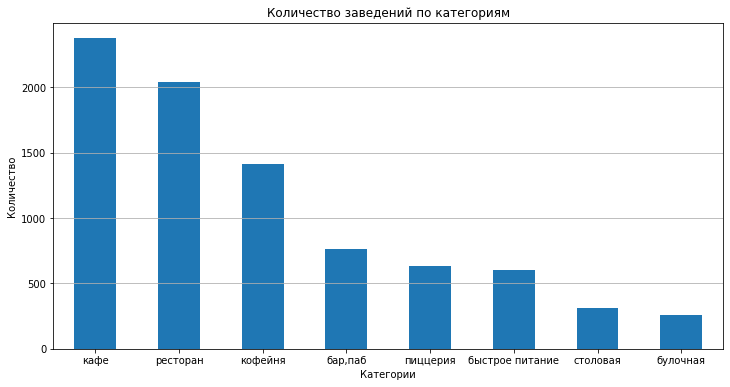

In [40]:
# Столбчатая диаграмма количества заведений по категориям 
df['category'].value_counts().plot(kind = 'bar',
                                  rot = 0,
                                  legend = False,
                                  title = 'Количество заведений по категориям',
                                  figsize = (12,6))
plt.xlabel('Категории')
plt.ylabel('Количество')
plt.grid(axis='y')
plt.show()

По столбчатой диаграмме видно, что на 2022 год, в Москве больше всего заведений категории "ресторан" - 1103 заведения. После идут, примерно на одном уровне, кофейни и кафе. Самое малое количество заведений в категории "булочная" - всего 54 заведения.

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [41]:
# Количество заведений по административным районам
df['district'].value_counts()

центральный административный округ         2242
северный административный округ             898
южный административный округ                892
северо-восточный административный округ     890
западный административный округ             850
восточный административный округ            798
юго-восточный административный округ        714
юго-западный административный округ         709
северо-западный административный округ      409
Name: district, dtype: int64

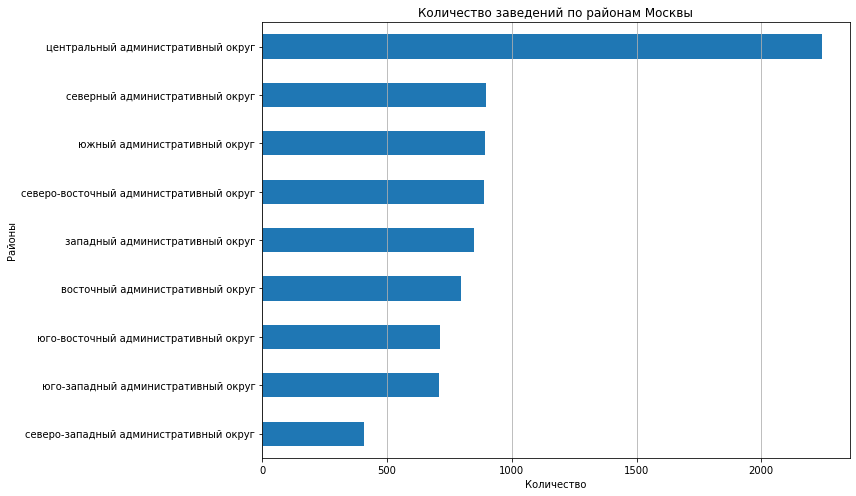

In [42]:
# Столбчатая диаграмма количества заведений по административным районам
df['district'].value_counts().sort_values().plot(kind = 'barh',
                                  rot = 0,
                                  legend = False,
                                  title = 'Количество заведений по районам Москвы',
                                  figsize = (12,7)
                                  )
plt.ylabel('Районы')
plt.xlabel('Количество')
plt.tight_layout()
plt.grid(axis='x')
plt.show()

In [43]:
# Посмотрим на количество заведений по категориям в центральном административном округе
df[df['district']=='центральный административный округ']['category'].value_counts()

ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64

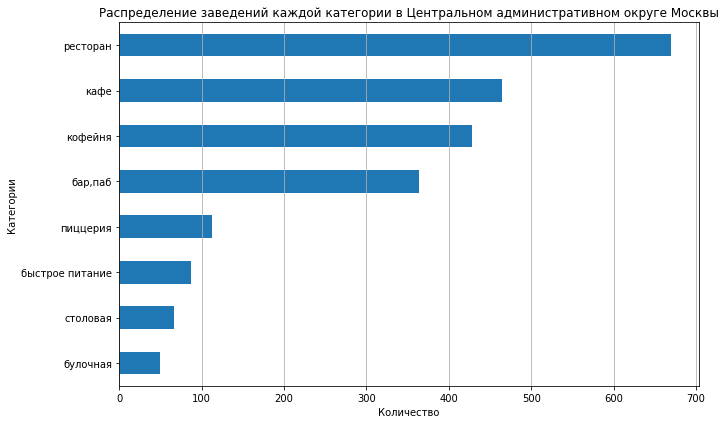

In [44]:
# Столбчатая диаграмма количества заведений по категориям в центральном административном округе
df[df['district']=='центральный административный округ']['category'].value_counts().sort_values().plot(kind = 'barh',
legend = False,
title = 'Распределение заведений каждой категории в Центральном административном округе Москвы',
figsize = (10,6))
plt.ylabel('Категории')
plt.xlabel('Количество')
plt.tight_layout()
plt.grid(axis='x')
plt.show()

По диаграммам видно, что заведений большая часть заведений находится в центральном административном округе Москвы. В самом округе большее всего заведений категории "ресторан" - 428 заведений. За ним следуют категории "бар,паб" - 261 и "кофейня" - 254, находящиеся примерно на одному уровне и с небольшым отстованием заведения категории "кафе" - 225 заведений данной категории.

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

In [45]:
# Общее количество сетевых и несетевых
df['chain'].value_counts()

0    5199
1    3203
Name: chain, dtype: int64

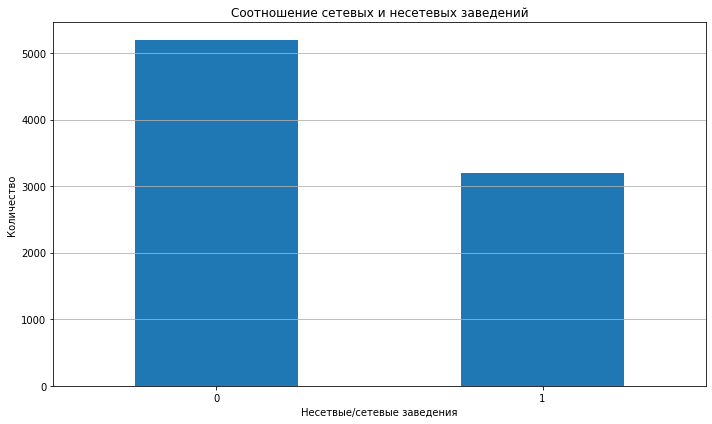

In [46]:
# Соотношение сетевых заведений и несетевых
df['chain'].value_counts().plot(kind = 'bar',
                                legend = False,
                                figsize = (10,6),
                                rot = 0,
                               title = 'Соотношение сетевых и несетевых заведений')
plt.xlabel('Несетвые/сетевые заведения')
plt.ylabel('Количество')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [47]:
chain_df = df[df['chain']==1].groupby('category').size()
chain_df

category
бар,паб            168
булочная           157
быстрое питание    232
кафе               779
кофейня            720
пиццерия           330
ресторан           729
столовая            88
dtype: int64

In [48]:
# Группируем значения по категориям заведений
grouped_df = df.groupby('category').size()
grouped_df

category
бар,паб             764
булочная            256
быстрое питание     603
кафе               2376
кофейня            1413
пиццерия            633
ресторан           2042
столовая            315
dtype: int64

In [49]:
chain_share = round(chain_df/grouped_df,2)
chain_share

category
бар,паб            0.22
булочная           0.61
быстрое питание    0.38
кафе               0.33
кофейня            0.51
пиццерия           0.52
ресторан           0.36
столовая           0.28
dtype: float64

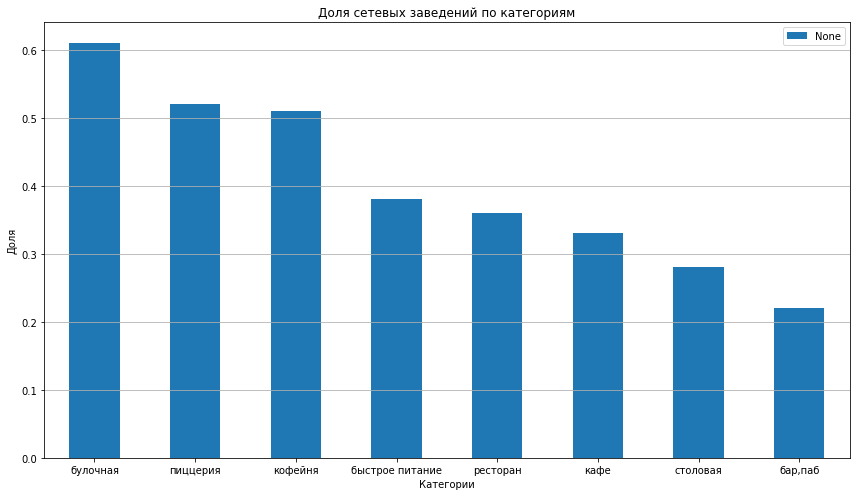

In [50]:
# Столбчатая диаграмма соотношения категории заведения и его типа: сетевой или несетевой
chain_share.sort_values(ascending=False).plot(kind = 'bar',
                legend =True,
                xlabel = 'Категории',
               ylabel = 'Доля',
               title = 'Доля сетевых заведений по категориям',
               figsize = (12,7),rot = 0)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

По диаграммам видно, что количество несетевых заведений больше, чем сетевых. В разрезе по категориям ситуация примерно схожая.
Несетевые рестораны имеют большее количество, чем сетевые. Это относится и к столовым, кофейням, кафе, заведениям быстрого питания, баром\пабом и булочным. В категории "пиццерия" сетевых заведений больше, чем несетевых. 

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


In [51]:
# Рассмотрим данные распределения значений в столбце seats
df['seats'].describe()

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

В данных, на первый взгляд, присутствуют аномально высокие и низкие значения. Так, минимальное количество посадочных мест является - 0, а максимальное - 1288. Посмотрим на диаграмму размаха

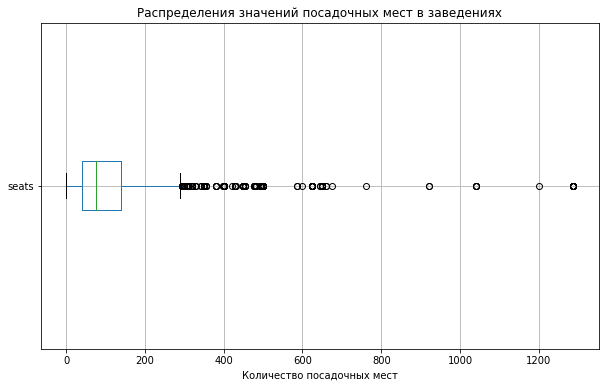

In [52]:
# Диаграмма размаха с выбросами
df.boxplot(column = 'seats',vert = False, figsize = (10,6))
plt.title('Распределения значений посадочных мест в заведениях')
plt.xlabel('Количество посадочных мест')
plt.show()

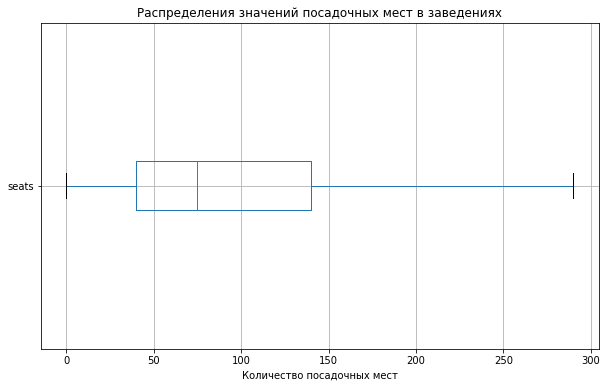

In [53]:
# Диаграмма размаха без выбросов
df.boxplot(column = 'seats',vert = False, figsize = (10,6), showfliers = False)
plt.title('Распределения значений посадочных мест в заведениях')
plt.xlabel('Количество посадочных мест')
plt.show()

На диграмме видно, что основное количество данных находится в промежутке от 80 до 150. Также видно препологаемые выбросы. Посмотрим на гистрограмму для столбца `seats` 

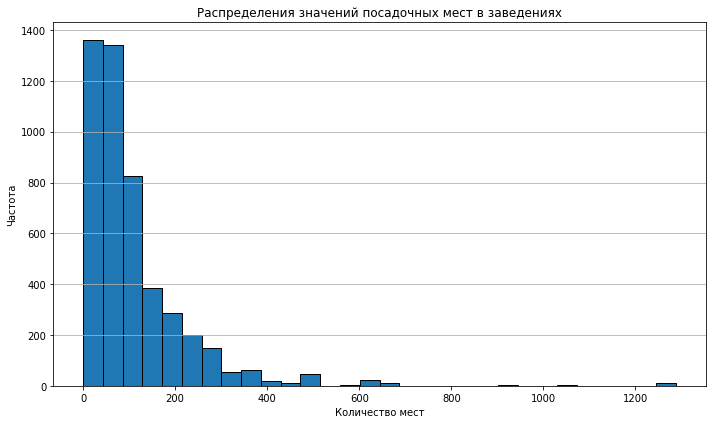

In [54]:
# Строим гистрограмму распределения значений столбца seats по всем данным
df['seats'].plot(kind = 'hist',
                edgecolor = 'black',
                bins = 30,
                figsize = (10,6),
                title = 'Распределения значений посадочных мест в заведениях')
plt.xlabel('Количество мест')
plt.ylabel('Частота')
plt.tight_layout()
plt.grid(axis='y')

Можем увидеть правоасимметричное распределение данных. Также видно, что "хвост" гистограммы заканчивается приблизительно на 500-ом значении "корзинки" количества мест. Эти данные можно не относить к выбросам. А вот следующие "корзинки" можно считать выбросами.

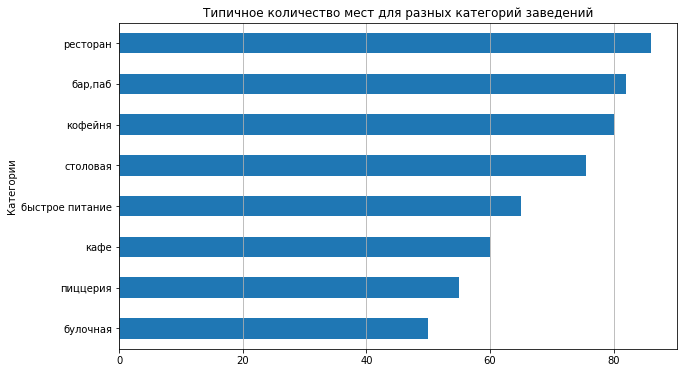

In [55]:
# Сгруппируем по категориям и найдем медианное значение 'seats' для категорий заведений
typical_seats = df.groupby('category')['seats'].median()

# Сортируем по убыванию количества мест
typical_seats.sort_values().plot(kind='barh',
                         rot=0,
                         title='Типичное количество мест для разных категорий заведений',
                         xlabel = 'Категории',
                         ylabel = 'Количество',
                         figsize = (10,6))
plt.grid(axis = 'x')
plt.show()

В процессе анализа данных по столбцу `seats` были обнаружены аномальные значения и выбросы. Чаще всего в заведениях находится 80-100 посадочных мест. Сгруппированные по категориям медианные значения посадочных мест отражены в столбчатой диаграмме. Рестораны, булочные, и бары\пабы имеют медианное значение количество мест больше 80. Столовые и кофейни имеют около 80 посадочных мест. Самое малое медианное количество мест относится к пиццериям.

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [56]:
# Средние показатели рейтинга по категорим
df.groupby('category')['rating'].mean().reset_index()

,category,rating
0,"бар,паб",4.387696
1,булочная,4.268359
2,быстрое питание,4.050249
3,кафе,4.124285
4,кофейня,4.277282
5,пиццерия,4.301264
6,ресторан,4.290402
7,столовая,4.211429


In [57]:
# Уникальные значения столбца rating
df['rating'].unique()

array([5. , 4.5, 4.6, 4.4, 4.7, 4.8, 4.3, 4.9, 4.2, 4.1, 4. , 3.8, 3.9,
       3.7, 3.6, 2.8, 2.7, 3.1, 1.5, 2. , 1.4, 3.3, 3.5, 3.2, 2.9, 3. ,
       3.4, 2.3, 2.2, 2.5, 2.6, 1.7, 1. , 1.1, 2.4, 1.3, 1.2, 2.1, 1.8,
       1.9, 1.6])

Text(0.5, 33.0, 'Категории')

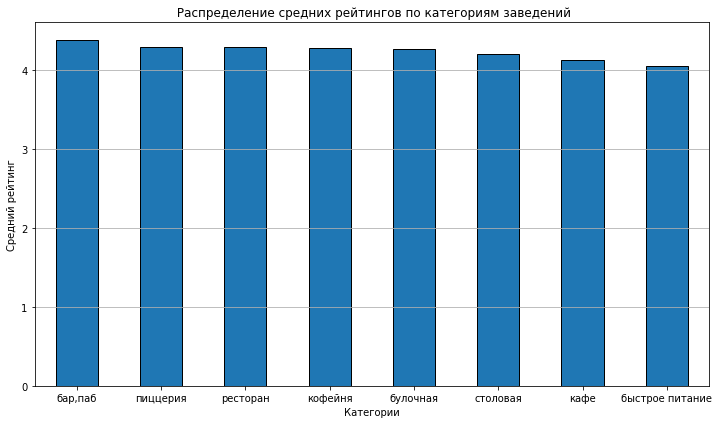

In [58]:
# Строим гистограмму распределения средних рейтингов по категориям
df.groupby('category')[['rating']].mean().sort_values(by='rating',ascending = False).plot(kind = 'bar',
title = ' Распределение средних рейтингов по категориям заведений',
rot = 0,
edgecolor = 'black',
figsize = (10,6),
legend= False
)
plt.tight_layout()
plt.grid(axis='y')
plt.ylabel('Средний рейтинг')
plt.xlabel('Категории')

Судя по гистограмме, в среднем все категории заведений имеют оценку выше 4 баллов. Чаще выставляется оценка 4.3 балла

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [59]:
# Выводим названия столбцов датасета
df.columns

Index(['id', 'name', 'category', 'address', 'district', 'hours', 'rating',
       'chain', 'seats', 'price', 'avg_bill', 'middle_avg_bill',
       'middle_coffee_cup', 'is_24_7'],
      dtype='object')

In [60]:
# Строим матрицу корреляции

correlation_matrix = df[['name','category', 'district','rating',
       'chain', 'seats', 'price','avg_bill', 'is_24_7']].phik_matrix(verbose=False)

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
name,0.489972
avg_bill,0.453687
price,0.294943
district,0.200761
category,0.189716
is_24_7,0.150365
chain,0.107833
seats,0.000000


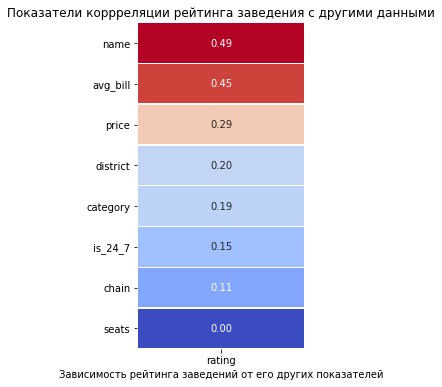

In [61]:
# Строим тепловую карту на основе матрицы корреляции
plt.figure(figsize=(3,6))
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            linewidths=0.5,
            cbar=False 
           )


plt.title('Показатели коррреляции рейтинга заведения с другими данными')
plt.xlabel('Зависимость рейтинга заведений от его других показателей')


plt.show() 

По тепловой карте можно заметить положительную корреляцию у рейтига с названием заведения и его средним чеком заведения. Слабовыраженная положительная корреляция у рейтинга с ценовой категорией, расположением заведения относительно округа, категорией заведения и тем, работает ли заведения круглосуточно. Является ли заведение сетевым или нет и количество мест совершенно не влияет на его рейтинг.

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [62]:
# Находим 15 самых популярных заведений в Москве
df.groupby(['name']).agg({'id':'count','rating':'mean'}).sort_values(by = 'id',ascending = False).head(15)

,id,rating
name,,
кафе,188,3.884574
шоколадница,120,4.177500
домино'с пицца,77,4.171429
додо пицца,74,4.286486
one price coffee,72,4.069444
яндекс лавка,69,3.872464
cofix,65,4.075385
prime,50,4.116000
хинкальная,44,4.322727


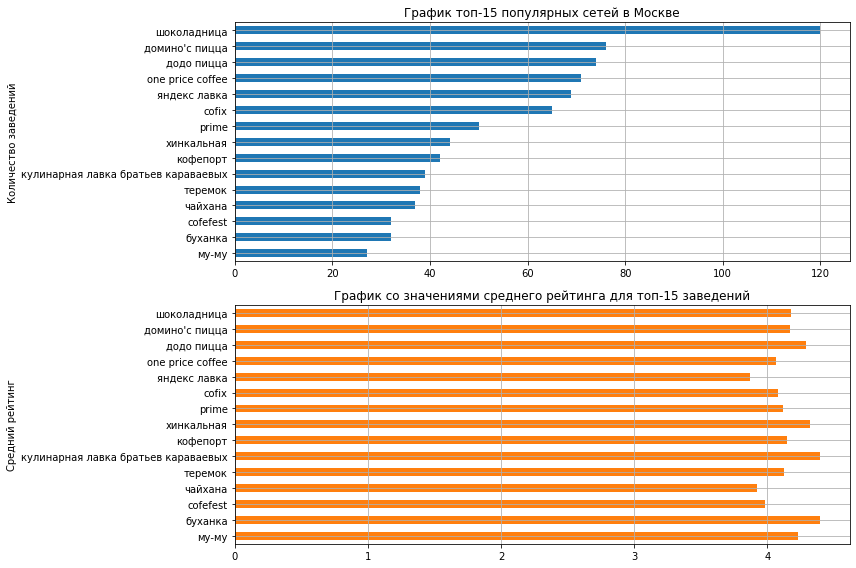

In [63]:
# Строим столбчатую диаграмму для топ-15 популярных заведений
top_15_mean = df[df['chain']==1].groupby(['name']).agg({'id':'count','rating':'mean'}).sort_values(by = 'id',ascending = True).tail(15)
axes = top_15_mean.plot.barh(title=['График топ-15 популярных сетей в Москве','График со значениями среднего рейтинга для топ-15 заведений'],
               rot=0,
                legend = False,
                figsize=(12,8),
                subplots =True,
                sharex=False,
                sharey = True)
plt.tight_layout()

axes[0].set_ylabel('Количество заведений')
axes[1].set_ylabel('Средний рейтинг')

axes[0].grid(which='major')
axes[1].grid(which='major')


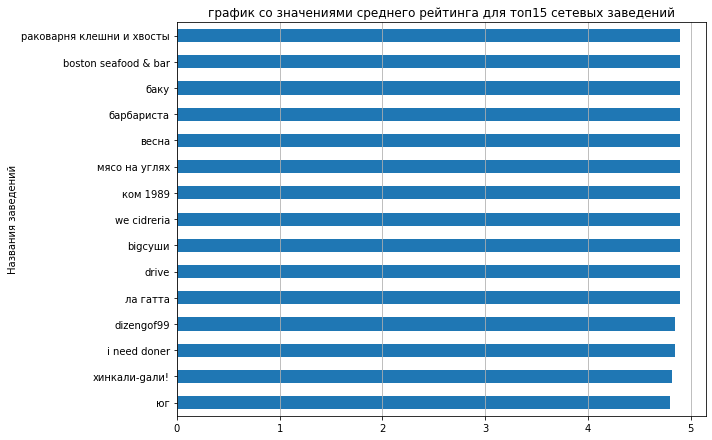

In [64]:
# Находим топ-15 сетевых заведений по среднему значению рейтинга 
df[df['chain']==1].groupby('name')['rating'].mean().sort_values(ascending=True).tail(15).plot.barh(legend =False,
                                                                                                   figsize=(10,6),
                                                                                                   xlabel='Названия заведений',
                                                                                                   ylabel='Средний рейтинг')
plt.tight_layout()
plt.title('график со значениями среднего рейтинга для топ15 сетевых заведений')
plt.grid(axis='x')

По графикам видно,что самой популярной сетью заведений является "Шоколадница" с 120 заведениями в Москве. Следом за ней, с отстованием почти в треть по количеству заведений следуют пиццерии "Домино'с пицца" и "Додо пицца", "One price coffe","Яндекс Лавка" и "Cofix". В среднем их средний рейтинг выше 4. При этом заведением с самым высоким средним рейтингом является "Раковарня "Клешни и хвосты".

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [65]:
# Общее информация о вариациях значений среднего чека
df.groupby('district').agg({'middle_avg_bill':['nunique','mean']}).sort_values(by = ('middle_avg_bill','nunique'),ascending = False)

middle_avg_bill             
                                                nunique         mean
district                                                            
центральный административный округ                  120  1191.057547
южный административный округ                         86   834.398089
северный административный округ                      83   927.959627
северо-восточный административный округ              83   716.611296
западный административный округ                      74  1053.225490
восточный административный округ                     72   820.626923
юго-восточный административный округ                 67   654.097938
юго-западный административный округ                  64   792.561702
северо-западный административный округ               59   822.222930

In [66]:
# Находим вариации значений
district_mab = df.pivot_table(values='middle_avg_bill',index = 'district',aggfunc=
                              'nunique').sort_values(by='middle_avg_bill',ascending=False)
district_mab_mean = df.pivot_table(values='middle_avg_bill',index = 'district',aggfunc=
                              'mean').sort_values(by='middle_avg_bill',ascending=False)
display(district_mab)

,middle_avg_bill
district,
центральный административный округ,120
южный административный округ,86
северный административный округ,83
северо-восточный административный округ,83
западный административный округ,74
восточный административный округ,72
юго-восточный административный округ,67
юго-западный административный округ,64
северо-западный административный округ,59


---


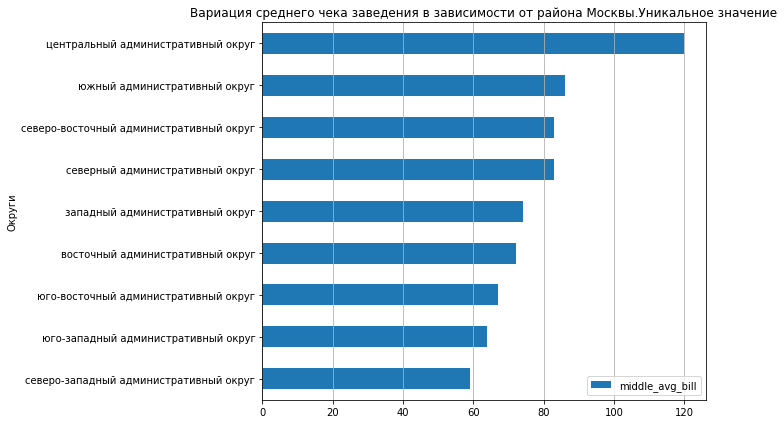

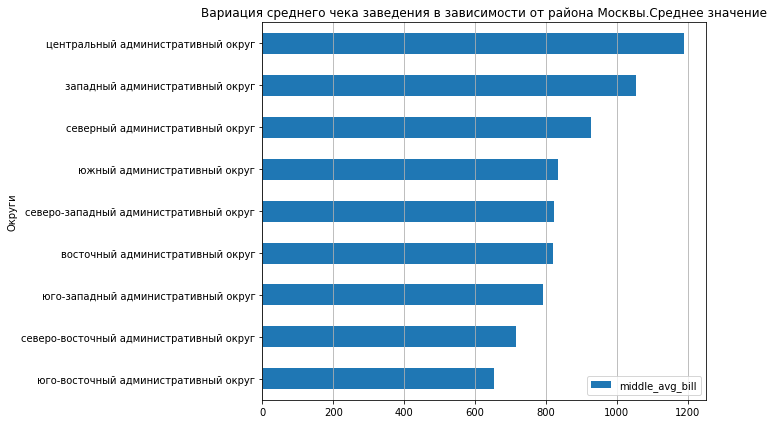

In [67]:
# Строим столбчатую диаграмму вариаций значений по округам
district_mab.sort_values(by='middle_avg_bill',ascending=True).plot(kind='barh',
                 figsize=(10,6),
                 title='Вариация среднего чека заведения в зависимости от района Москвы.Уникальное значение',
                 ylabel = 'Количество вариаций',
                 xlabel = 'Округи')
plt.tight_layout()
plt.grid(axis='x')
district_mab_mean.sort_values(by='middle_avg_bill',ascending=True).plot(kind='barh',
                 figsize=(10,6),
                 title='Вариация среднего чека заведения в зависимости от района Москвы.Среднее значение',
                 ylabel = 'Среднее значение',
                 xlabel = 'Округи')
plt.tight_layout()
plt.grid(axis='x')

По таблице с вариациями и диаграмме видно, что центральный административный округ имеет большее количество вариаций среднего чека по сравнению с остальным округами- 120 вариаций.За ним идут южный, северный и северо-восточный округа. В самом конце можно заметить,что восточные направления имеют меньшее количество вариаций и меньшее среднее значение.

---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

По результат исследовательского анализа данных, можно сделать вывод: 
- Рестораны являеются самой многочисленной категорией заведений в Москве и её округах. 
- Самым популярным заведением является кофейня "Шоколадница". 
- Чем восточнее и южнее находятся от Москвы заведения, тем меньше среднее значение среднего чека и меньше вариаций значений. 
- В среднем, все категории заведений получают рейтинг 4+.
- Большая часть заведений в среднем имеет от 80 до 100 посадочных мест.

<a id='4'></a>
## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.

В ходе исследования проанализировали данные о заведениях общественного питания Москвы за 2022 год. Данные включали информацию о заведениях, местоположение, время работы, а также информацию о среднем чеке в заведениях. Требовалось проанализировать имеющуюся информацию, чтобы найти идеальную формулу для открытия заведения общественного питания. 

Результаты исследовательского анализа:
- Самой распространенной категорией заведений является ресторан. 
- В центральном административном округе Москвы находится самое наибольшее число заведений — 2242 заведение!
- Большая часть заведений являются несетевыми.
- Заведения общественного питания в среднем имеют 80-100 посадочных мест.
- Все категории заведений имеют в среднем оценку 4+.
- Основная часть положительных оценок заведений (4-4,5) относится к заведениям со средним чеком заведений (1000-1500 руб.).
- При том, что ресторан — самая частая категория заведений в Москве, самым популярным заведением является кофейня «Шоколадница».
- Несмотря на это, самым высокооценным заведением является "Раковарня "Клешни и хвосты" со средним рейтингом 4.90 против 4.17 у "Шоколадницы"
 
Также существует связь между расположением заведения и его средним чеком. Так, чем восточнее и южнее располагается заведение, тем меньше средний чек заведения и его вариация.
 
В качестве рекомендаций стоит обратить на северные и западные районы Москвы. Лучше всего центральный. Для категории заведения стоит лучше всего подойдёт ресторан либо кофейня. Также не стоит забывать о среднем чеке заведения. Лучше будет, если заведение будет среднеценового сегмента. Так оно многовероятнее будет получать высокие оценки от гостей.